# Example 1 - Modeling a single conduit

This is the first notebook in a series aiming at introducing pyKasso.

In this notebook we show how to create an ensemble of the simplest possible Discrete Karst conduit Network in 2D: a single conduit connecting a known inlet and a known outlet.

To run this notebook, you must first install the pyKasso package on your machine. The code and instructions are  available on the [github page](https://github.com/randlab/pykasso).

This notebook is accompanying the paper cited below.

**Reference**: Miville, F., C. Fandel, and P. Renard, 2024, pyKasso: an open-source Discrete Karst Network (DKN) generator. Submitted to Environmental Modelling and Software.

© 2024 *François Miville, Chloé Fandel and Philippe Renard - University of Neuchâtel / Carleton College*

## 1. Initialization

The first step consists in importing the pykasso package, and creating the pykasso application. 

Then, the dimension of the grid covering the domain of interest must be defined, and the project is created using the pykasso application.

When this is done, pykasso creates a subdirectory in the current folder. This new folder has the same name as the project name and will contain all the model parameters, the logs, and the outputs.

In [1]:
import os # For path compatibility on windows/linux/mac

# Import the pyKasso package
import pykasso as pk

# Create a pyKasso application
app = pk.pykasso()

# Declare the grid parameters
grid_parameters = {
    'x0': 0, 'y0': 0, 'z0': 0,
    'nx': 300, 'ny': 300, 'nz': 1,
    'dx': 10, 'dy': 10, 'dz': 10
}

# Declare the project parameters
app.new_project(name='example_01', grid_parameters=grid_parameters)

## 2. Setting the model parameters

To run pyKasso, the minimal information that must be passed to the code is the information concerning the inlets and outlets. Most of the other parameters are defined with default values and can be ommitted. 

Here, we indicate the location of the inlet (in the middle of the left side of the domain), and the location of the outlet (on the right side of the domain). The number of inlets and outlets must be provided even if we have only one inlet or outlet. 

We then define two families of random fractures. One is oriented at 135 degrees and the other at 45 degrees from the North. The density represent the mean number of fracture object per square meter. The fractures are vertical and of constant length. One can find in Miville et al (2024) how to set some probabilistic distributions for the length or orientation.

*Remark:* Note that the last parameter `sks` is defined even if it empty. This parameter can contain specific information concerning the stochastic karst simulation algorithm, like the definition of the type of fast marching method, but here we will just use the default parameters and do not need to define them. But one must define the sks parameter even if it is empty otherwise pyKasso would not function.


In [2]:
# Declare the model parameters
model_parameters = {
    'inlets' : {
        'data' : [[0, 1500]],
        'number': 1
    },
    'outlets' : {
        'data' : [[2990, 1500]],
        'number' : 1
    },
    'fractures' : {
        'generate': {
            'family_01': {
                'density'      : 0.00005,
                'orientation'  : 135,
                'dip'          : 90,
                'length'       : 300,
            },
            'family_02': {
                'density'      : 0.00005,
                'orientation'  : 45,
                'dip'          : 90,
                'length'       : 500,
            }
        }
    },
    'sks' : {}
}

## 2. Generating the karst network simulations

In the next block of code, we run a set of pykasso simulations to obtain an ensemble of simulations. 

One can adjust the number of simulations. We use 10 to start demonstrating the methodology. 

Then, for each simulation we change in the dictionnary of parameters the seed of the random number generator. We then call pyKasso using the `model.generate()` method with the updated parameters.

For each run of pyKasso, a file directory is generated within the `example_01/outputs/`directory to store the results of the simulation in a pickle file. 

In [3]:
n_simulations = 10 # Number of simulations

for i in range(n_simulations):
    model_parameters['sks']['seed'] = 982198+i
    app.model.generate(model_parameters=model_parameters)

## 3. Checking the simulations

To check the details of the simulation, one can have a look at some internal variables provided by pyKasso. 
Here, we generated a set of 10 realizations and those variables will give us information about the last simulation. 

For example, the `app.model.outlets` dataframe shows the identifier and the coordinates of the outlets. Here, we have only one outlet with an id=0.  

The `app.model.iterations` dataframe contains the outlets and inlets that are considered at each iteration of the fast matching algorithm. In this simple example, there is only one iteration connecting the inlet 0 with outlet 0. 

The `app.model.conceptual_model_table` summarizes the features that are considered during the modeling and shows the costs for the fast marching algorithm.

The content of these tables is useful to control how pyKasso inmported the different input parameters and to check them.

In [4]:
print( "\nmodel.outlets:" ) 
display( app.model.outlets )

print( "\nmodel.iterations:" ) 
display( app.model.iterations )

print( "\nmodel._outlets:" ) 
display( app.model._outlets )

print( "\nmodel.conceptual_model_table :" ) 
display( app.model.conceptual_model_table )


model.outlets:


,x,y,z
0,2990,1500,-4.488861



model.iterations:


,outlets,inlets
iteration,,
0,[0],[0]



model._outlets:


,x,y,z,outlet_iteration
0,2990,1500,-4.488861,0



model.conceptual_model_table :


,feature,data_id,name,cost
model_id,,,,
0,Out,NaN,NaN,10.0
100,Geology,1.0,unit 1,0.4
200,Fractures,1.0,family_01,0.2
201,Fractures,2.0,family_02,0.2



To know in detail what pyKasso has been doing and potentially debug a problem, one can open the file `project.log` in the `example_01` directory. For this specific example, many parameters were not set and their default values have been used. This results in many warning messages in the log.

Finally, it is also very useful to look at the object `app.model.model_parameters` to check all the input parameters of the last simulation. For example, the names of the parameters that have not been set are visible as empty dictionnaries.

In [5]:
display( app.model.model_parameters )

{'inlets': {'data': [(0, 1500, np.float64(-0.1670676554528132))],
  'shuffle': False,
  'importance': [1],
  'subdomain': 'domain_surface',
  'geology': None,
  'seed': None,
  'number': 1},
 'outlets': {'data': [(2990, 1500, np.float64(-4.488861168745737))],
  'shuffle': False,
  'importance': [1],
  'subdomain': 'domain_surface',
  'geology': None,
  'seed': None,
  'number': 1},
 'fractures': {'data': None,
  'axis': 'z',
  'names': {},
  'model': {},
  'seed': None,
  'generate': {'family_01': {'density': 5e-05,
    'orientation': 135,
    'dip': 90,
    'length': 300},
   'family_02': {'density': 5e-05,
    'orientation': 45,
    'dip': 90,
    'length': 500}}},
 'sks': {'seed': 982207,
  'algorithm': 'Isotropic3',
  'costs': {'out': 10,
   'geology': 0.4,
   'beddings': 0.35,
   'faults': 0.2,
   'fractures': 0.2,
   'karst': 0.1,
   'conduits': 0.1,
   'ratio': 0.5},
  'factors': {'F': 100, 'F1': 100, 'F2': 50},
  'mode': 'A'},
 'verbosity': {'logging': 0, 'agd': 0},
 'geology':

## 4. Ploting the DKN

pyKasso offers also a set of methods to visualize rapidly the results. Most of these functions are based on the matplotlib library but they are predefined in such a way that they facilitate the rapid visualization of the results. By default, the plot is done on the results of the last simulation.

In the code below, a figure showing the karst network is generated by the command `app.visualizer.mpl_plot_2D()` and stored in the `f01` pyKasso Figure object. In a jupyter notebook, the figure will be directly plotted within the notebook.

But because the Figure object is stored, it can be plotted again with the method `display` or it can also be modified by experimented users who can access the matplotlib figure, axes and colorbar. We will not cover these advanced features in this notebook.

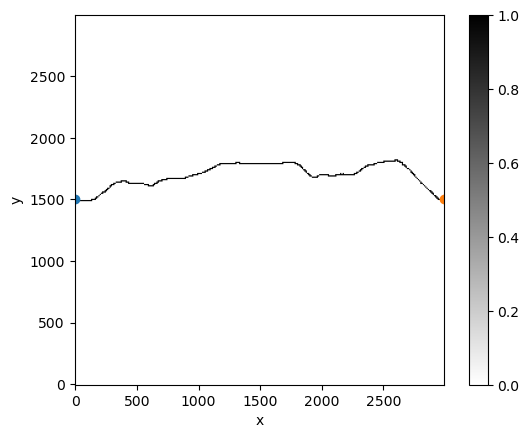

In [6]:
%matplotlib inline
f01 = app.visualizer.mpl_plot_2D(feature='karst',
                                 imshow_options={'cmap': 'binary'},
                                 scatter_inlets_options={},
                                 scatter_outlets_options={},
                                 )

The figure can also be saved in a file using the following syntax.

In [7]:
figfilename = os.path.join('fig', 'example_01_karst.png') # for compatibility windows/linux
f01.fig.savefig(figfilename, bbox_inches='tight')

## 5. Plotting other quantities

The same command can be used to plot the fractures, the cost, or the time computed with the fast marching.

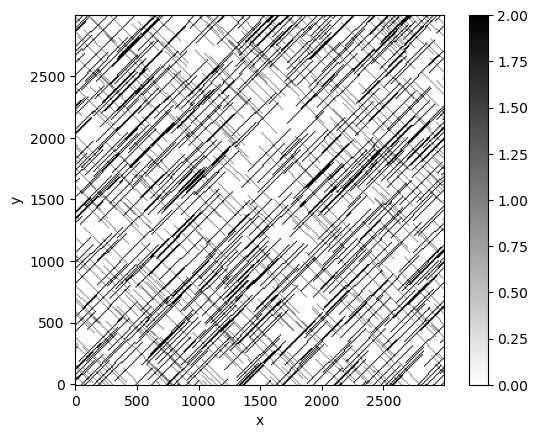

In [8]:
app.visualizer.mpl_plot_2D(feature='fractures', imshow_options={'cmap': 'binary'});

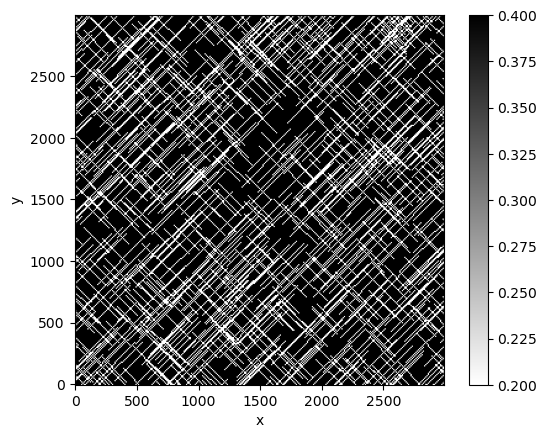

In [9]:
app.visualizer.mpl_plot_2D(feature='cost', imshow_options={'cmap': 'binary'});

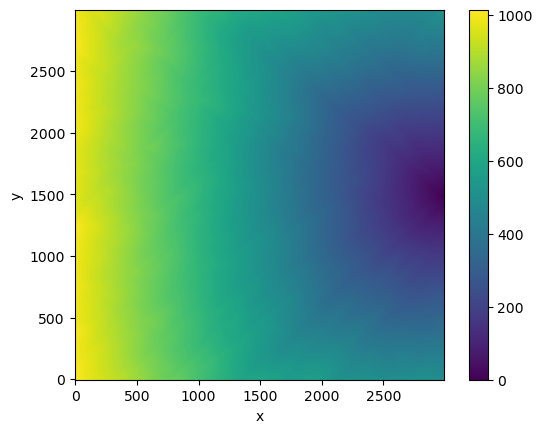

In [10]:
app.visualizer.mpl_plot_2D(feature='time');

## 6. Analyzing the results

For this simple example, we want to compute the map of the probability of occurence of observing a conduit in the domain. We use the `analyzer` module to postprocess the ensemble of simulations. The `compute_stat_on_networks` function is used to compute the mean of all the simulations. For the plot, we use again the `visualizer.mpl_plot_array_2D` command with a few options to show the colorbar, control the extent of the figure, and define the range of values for the color bar.

If only 10 simulations were generated earlier, the probability map will not be meangingfull. A larger number of simulations must be simulated to obtain a reasonable probability map.

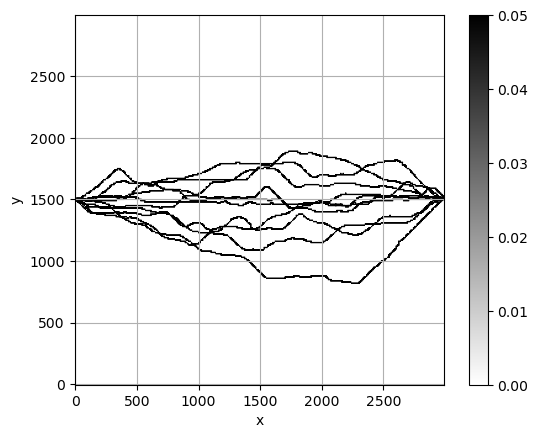

In [8]:
# Compute the mean of all the simulated karstic networks
probability = app.analyzer.compute_stats_on_networks('mean')

# Define the extent of the plot
extent = app.project.grid.extent

# Define matplotlib.pyplot.imshow parameters
imshow_options = {
    'extent' : extent,
    'cmap': 'binary',
    'vmin' : 0,
    'vmax' : 0.05,
}

# Plot and save the figure
f05 = app.visualizer.mpl_plot_array_2D(array=probability, imshow_options=imshow_options, 
                                       show_colorbar=True, show_grid=True);
figfilename = os.path.join('fig', 
                           'example_01_mean_karstic_network.png') # for compatibility windows/linux
f05.fig.savefig(figfilename, bbox_inches='tight')